In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import matplotlib.pyplot as plt
import scanpy as sc

usr = !echo $USER
datadir = '.'

# Load data

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_origin='hartmann',
    data_path=datadir + 'hartmann/',
    radius=35,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:00<00:00, 130.73it/s]

Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036

 Celldata metadata: {'lateral_resolution': 0.390625, 'fn': ['scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv', 'scMEP_sample_description.xlsx'], 'image_col': 'point', 'pos_cols': ['center_colcoord', 'center_rowcoord'], 'cluster_col': 'Cluster', 'cluster_col_preprocessed': 'Cluster_preprocessed', 'patient_col': 'donor'}


# Supp. Fig. 1: Cell-type centric summary statistics in MIBI TOF - cancer dataset. 

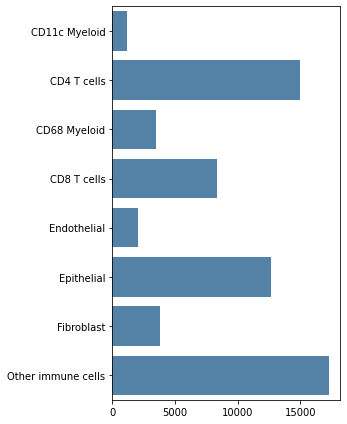

In [3]:
interpreter.data.celltype_frequencies()

0.0
5.400087997636394
10.193272571484671
50.84876334980765
410.52044893209495
1099.0862068965516


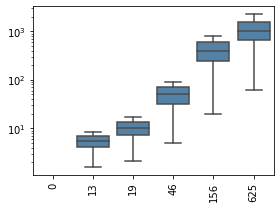

In [4]:
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 35, 50, 120, 400, 1600],
    lateral_resolution=400/1024,
)

# Supp. Fig. 2: Variance decomposition in MIBI TOF - cancer dataset.

100%|██████████| 58/58 [00:34<00:00,  1.68it/s]


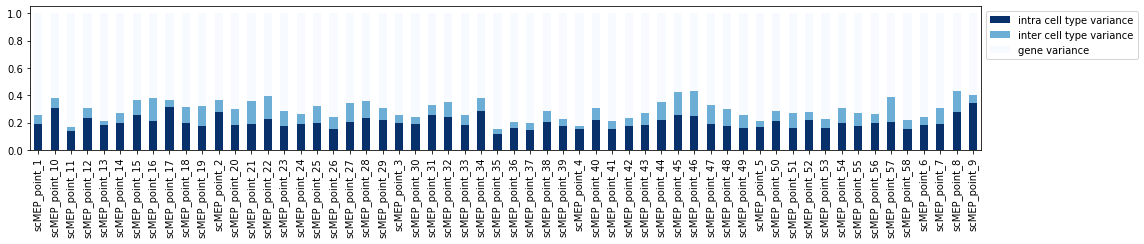

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition(undefined_type='other')
interpreter.data.variance_decomposition(var_decomp)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.203625
inter cell type variance    0.092683
gene variance               0.703692
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods.

100%|██████████| 58/58 [00:03<00:00, 18.94it/s]


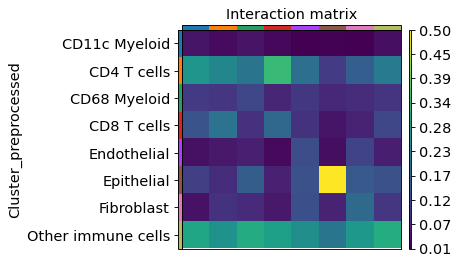

In [7]:
interpreter.data.celldata_interaction_matrix(figsize=(3,3))

# Supp. Fig. 7: Ligand–receptor permutation test. 

n cells: 25498


  0%|          | 0/1000 [00:00<?, ?permutation/s]

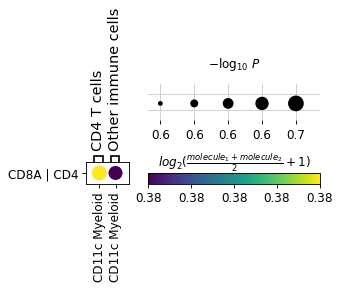

In [8]:
hgnc_names = [
    'H3-4', 
    'VIM', 
    'SMN1', 
    'SLC3A2', 
    'NFE2L2', 
    'CD4', 
    'CD14', 
    'PTPRC', 
    'PDCD1',
    'PECAM1', 
    'SDHA', 
    'MKI67', 
    'CS', 
    'RPS6', 
    'ITGAX', 
    'CD68', 
    'CD36', 
    'ATP5F1A',
    'CD247', 
    'ENTPD1', 
    'VDAC1', 
    'G6PD', 
    'XBP1', 
    'PKM', 
    'SLC1A5', 
    'SLC2A1', 
    'CD8A',
    'B3GAT1', 
    'LDHA', 
    'IDH2', 
    'HK1', 
    'CDH1', 
    'CPT1A', 
    'CKM', 
    'ATP1A1',
    'HIF1A'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    fraction=0.40,
    #fontsize=12,
    #width=2.,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

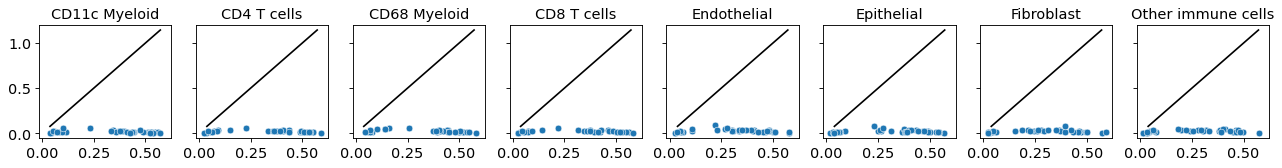

In [9]:
interpreter.data.noise_structure()

# Supp. Fig. 9: Attributing cell heterogeneity to niche composition in CD8 Tcells in colorectal cancer.

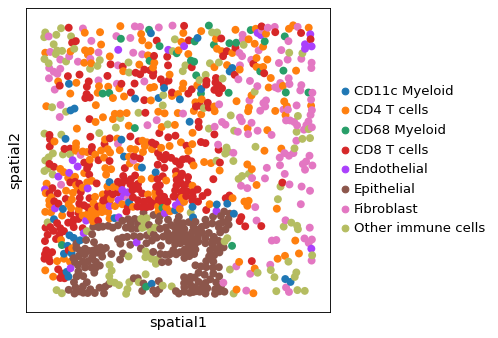

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sc.pl.spatial(
    interpreter.data.img_celldata['scMEP_point_16'],
    color='Cluster_preprocessed',
    spot_size=30,
    title='',
    ax=ax,
    show=False,
)
plt.show()